## Part -2 Linear Regression

### Import required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Read, Preprocess and printing main statistics

In [275]:
diamond_data = pd.read_csv("/Users/rohituddagiri/Documents/CSE 574/datasets/diamond.csv")
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [276]:
diamond_data.shape

(53940, 11)

### Attribute Information

https://ggplot2.tidyverse.org/reference/diamonds.html


**Format**

A data frame with 53940 rows and 10 variables:

**price**
price in US dollars ($326--$18,823)

**carat**
weight of the diamond (0.2--5.01)

**cut**
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**
diamond colour, from D (best) to J (worst)

**clarity**
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x**
length in mm (0--10.74)

**y**
width in mm (0--58.9)

**z**
depth in mm (0--31.8)

**depth**
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table**
width of top of diamond relative to widest point (43--95)

In [277]:
diamond_data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:
diamond_data.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### Check for null values in each column

In [20]:
diamond_data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [21]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [22]:
# list of features in the dataset

diamond_data.columns.to_list()

['Unnamed: 0',
 'carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z']

In [23]:
# unique values in the dataset

diamond_data.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [24]:
# check for duplicate values

diamond_data.duplicated().sum()

0

### Converting features with object data type to categorical data type

In [25]:
# diamond_data[['cut','color','clarity']].value_counts()
print('Different types of categories in each categorical column:\n')
print('Cut categories:\n',diamond_data.cut.value_counts(),'\n')
print('Color categories:\n',diamond_data.color.value_counts(),'\n')
print('Clarity categories:\n',diamond_data.clarity.value_counts(),'\n')


Different types of categories in each categorical column:

Cut categories:
 Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 

Color categories:
 G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 

Clarity categories:
 SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64 



In [26]:
# color- diamond colour, from J (worst) to D (best)

# clarity- a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

# cut- quality of the cut (Fair, Good, Very Good, Premium, Ideal)


cut_column = {'Ideal':0,'Fair':1,'Good':2,'Very Good':3,'Premium':4}

diamond_data['cut'] = diamond_data['cut'].apply(lambda each_value: cut_column.get(each_value))


color_column = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}

diamond_data['color'] = diamond_data['color'].apply(lambda each_value: color_column.get(each_value))


clarity_column = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}

diamond_data['clarity'] = diamond_data['clarity'].apply(lambda each_value: clarity_column.get(each_value))

print(diamond_data.sample(10))

       Unnamed: 0  carat  cut  color  clarity  depth  table  price     x  \
22437       22438   1.54    4      2        2   62.2   58.0  10466  7.45   
25195       25196   2.07    4      2        2   62.0   58.0  13786  8.17   
18020       18021   1.13    0      3        3   61.6   57.0   7290  6.70   
738           739   0.31    0      2        4   61.8   54.2    557  4.33   
84             85   0.26    2      5        6   57.9   60.0    554  4.22   
3825         3826   0.73    0      5        4   61.4   55.0   3471  5.80   
24897       24898   1.71    4      6        1   60.6   60.0  13325  7.76   
1919         1920   0.60    0      5        6   62.0   53.7   3082  5.40   
14324       14325   1.11    4      5        2   61.3   58.0   5802  6.61   
26246       26247   2.06    0      1        3   59.2   57.0  15691  8.39   

          y     z  
22437  7.32  4.59  
25195  8.09  5.04  
18020  6.68  4.12  
738    4.37  2.69  
84     4.25  2.45  
3825   5.82  3.57  
24897  7.69  4.68  
191

In [27]:
print(diamond_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  int64  
 3   color       53940 non-null  int64  
 4   clarity     53940 non-null  int64  
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 4.5 MB
None


### Removing Unnamed column and processing x,y,z columns

In [28]:
diamond_data = diamond_data[diamond_data['x']!=0]
diamond_data = diamond_data[diamond_data['y']!=0]
diamond_data = diamond_data[diamond_data['z']!=0]

In [29]:
diamond_data.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,1.906083,3.405972,3.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.692897,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,0.000000,2.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,2.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [30]:
diamond_data['volume'] = diamond_data['x']*diamond_data['y']*diamond_data['z']
diamond_data.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,1.906083,3.405972,3.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,129.897567
std,15571.269010,0.473795,1.692897,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,78.219789
min,1.000000,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984
25%,13487.750000,0.400000,0.000000,2.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.189759
50%,26973.500000,0.700000,2.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180
75%,40457.250000,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,170.846415
max,53940.000000,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


In [31]:
diamond_data.drop(['Unnamed: 0','x','y','z'],axis=1,inplace=True)

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,0,5,1,61.5,55.0,326,38.202030
1,0.21,4,5,2,59.8,61.0,326,34.505856
2,0.23,2,5,4,56.9,65.0,327,38.076885
3,0.29,4,1,3,62.4,58.0,334,46.724580
4,0.31,2,0,1,63.3,58.0,335,51.917250


### Data Visualizations

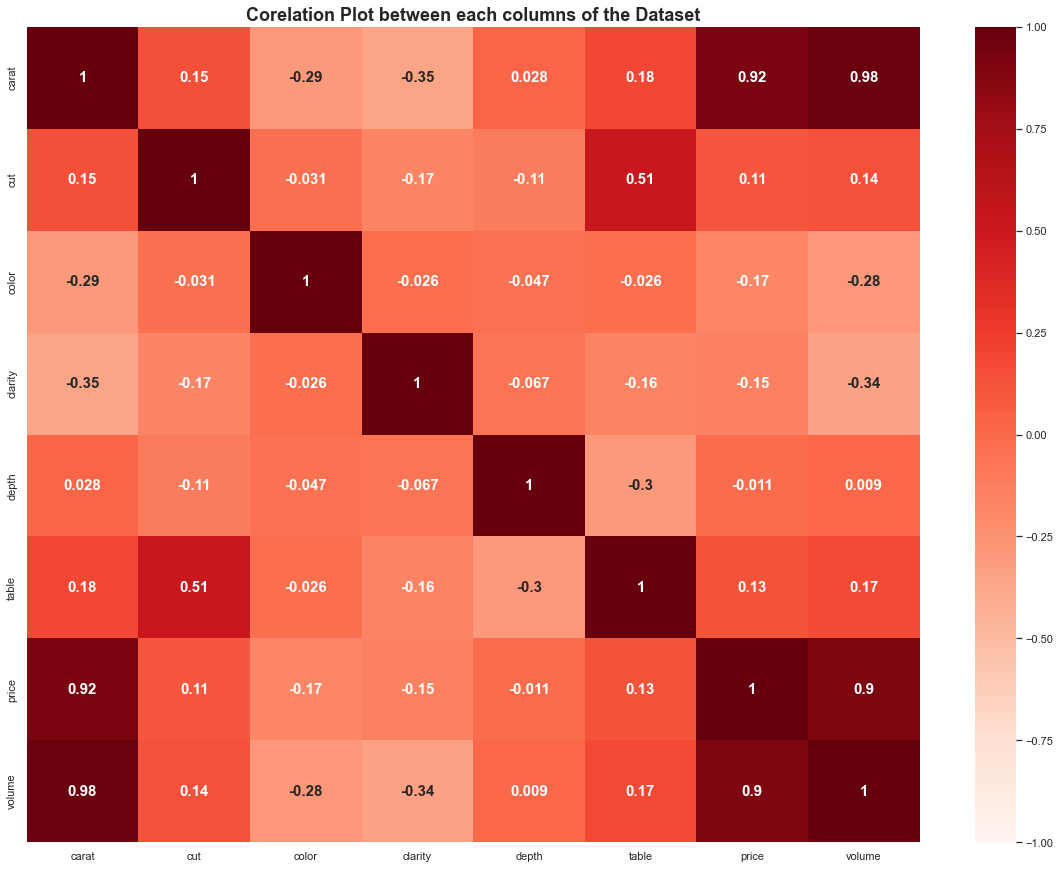

In [252]:
plt.figure(figsize=(20,15))
sns.heatmap(diamond_data.corr(), vmin=-1,cmap="Reds",annot=True,annot_kws={'fontsize':15, 'fontweight':'bold'})
plt.title("Corelation Plot between each columns of the Dataset",fontsize = 18, fontweight = 'bold')
plt.show()

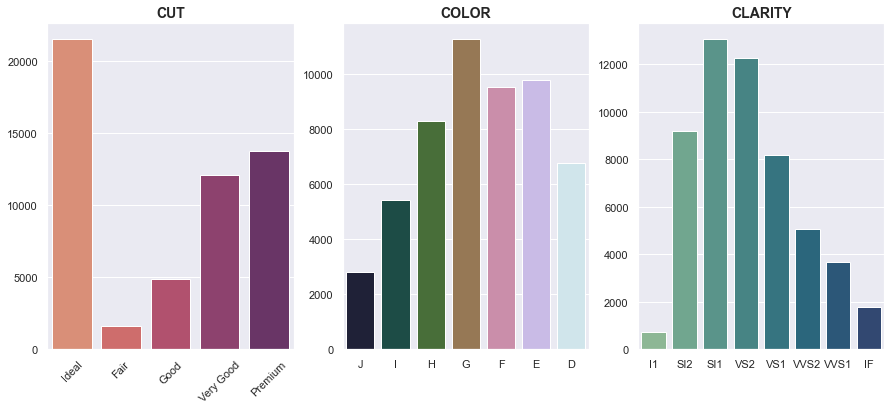

In [254]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.barplot(x = diamond_data['cut'].value_counts().index,y=diamond_data['cut'].value_counts().values,palette='flare')
plt.xticks(np.arange(5),['Ideal','Fair','Good','Very Good','Premium'],rotation = 45)
plt.title("CUT", fontsize = 14, fontweight = 'bold')

plt.subplot(1,3,2)
sns.barplot(x = diamond_data['color'].value_counts().index,y=diamond_data['color'].value_counts().values,palette='cubehelix')
plt.xticks(np.arange(7),['J','I','H','G','F','E','D'])
plt.title("COLOR", fontsize = 14, fontweight = 'bold')


plt.subplot(1,3,3)
sns.barplot(x = diamond_data['clarity'].value_counts().index,y=diamond_data['clarity'].value_counts().values,palette='crest')
plt.xticks(np.arange(8),['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
plt.title("CLARITY", fontsize = 14, fontweight = 'bold')
plt.show()

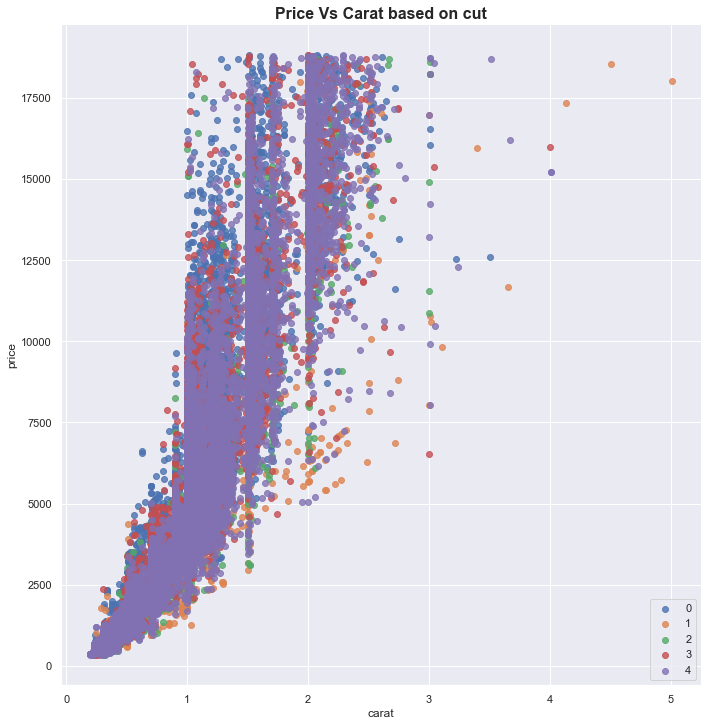

In [256]:
# variation of price with carat variables

sns.lmplot( x="carat", y="price", data=diamond_data, fit_reg=False, hue="cut", legend=False,height=10)
plt.title("Price Vs Carat based on cut",fontsize = 16, fontweight = 'bold')
plt.legend(loc='lower right')
plt.show()

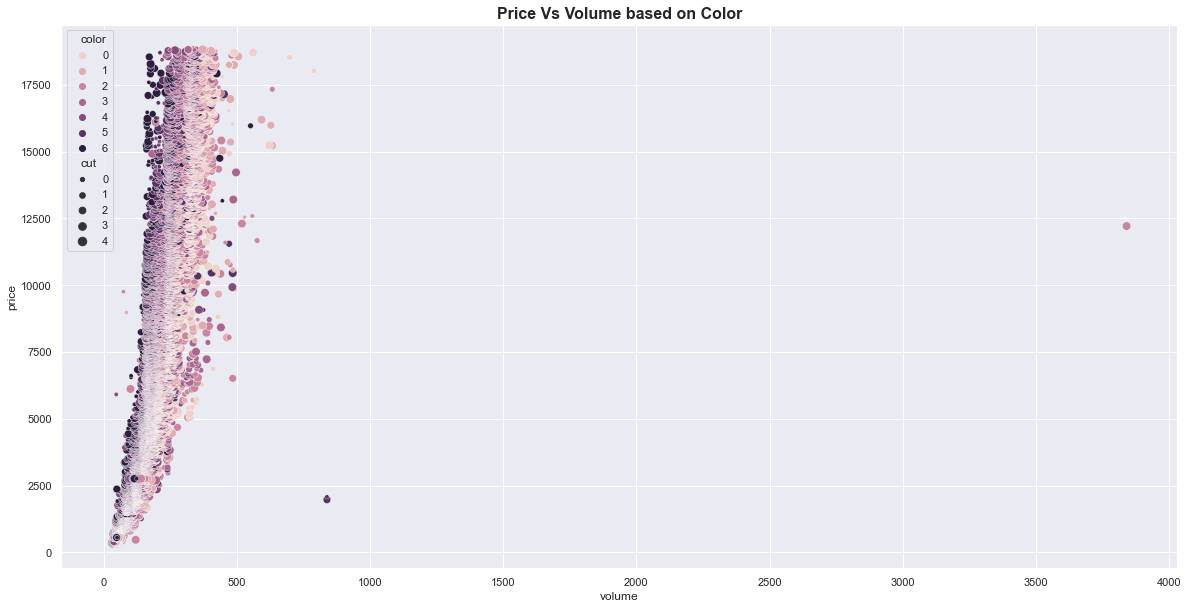

In [257]:
# variation of price with dimensions of the diamond

sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot( x="volume", y="price", data=diamond_data, hue="color",size="cut")
plt.title("Price Vs Volume based on Color",fontsize = 16, fontweight = 'bold')
plt.show()

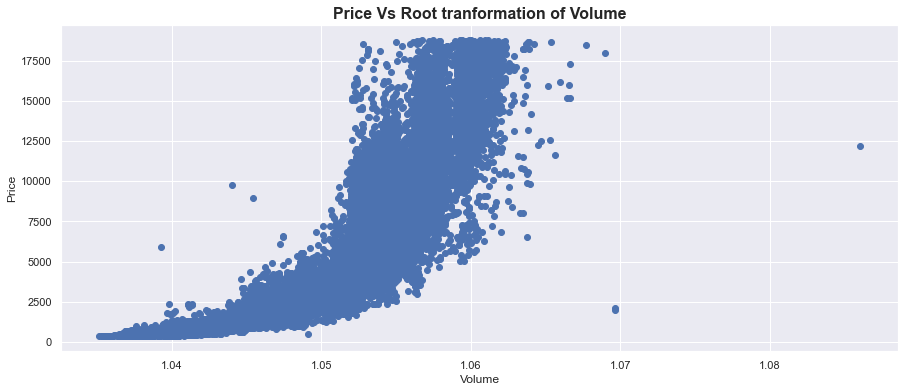

count    53920.000000
mean         1.048141
std          0.006071
min          1.035170
25%          1.042658
50%          1.048578
75%          1.052752
max          1.086035
Name: volume, dtype: float64

In [258]:
plt.figure(figsize=(15,6))
plt.scatter(x=diamond_data['volume'].apply(lambda ele: ele**(1/100)),y=diamond_data['price'])
plt.xlabel("Volume")
plt.ylabel("Price")
plt.title("Price Vs Root tranformation of Volume",fontsize = 16, fontweight = 'bold')
plt.show()

data = np.power(diamond_data['volume'],1/100)
data.describe()

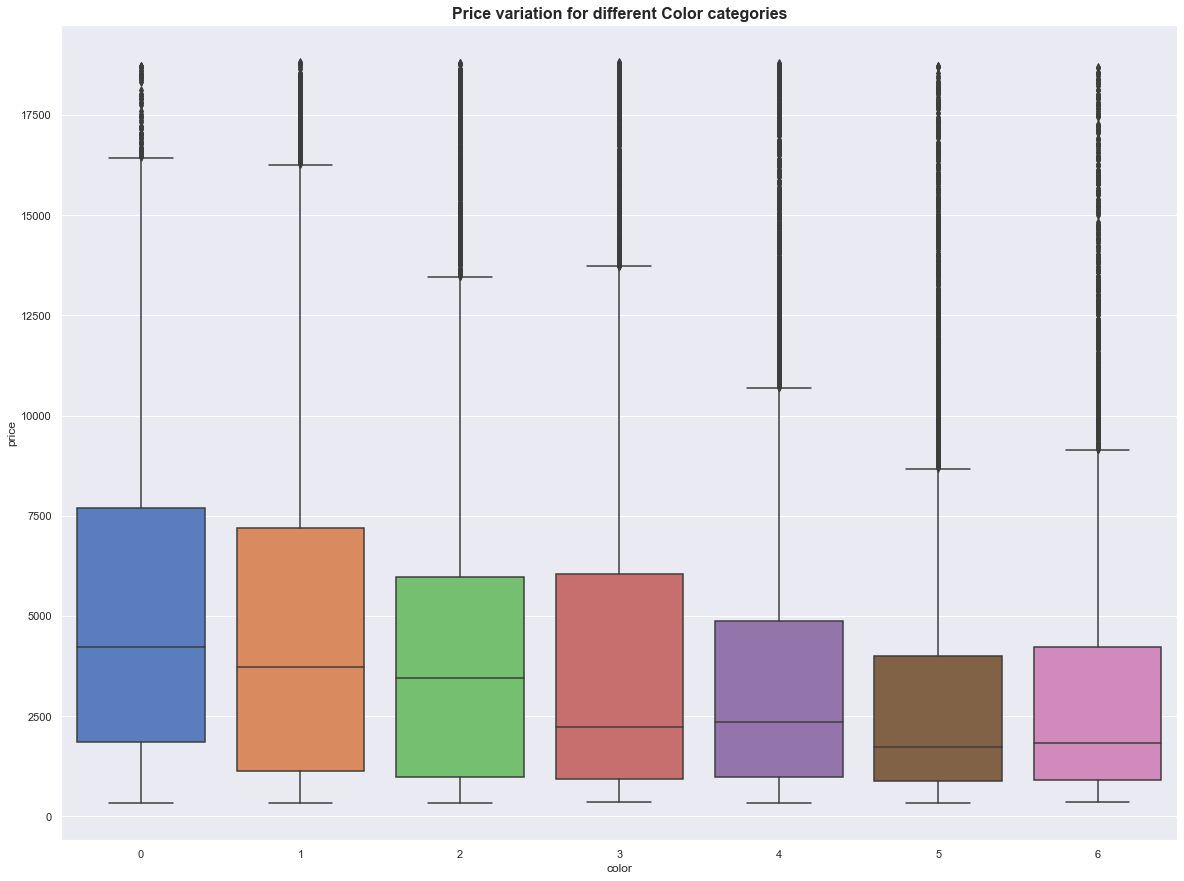

In [259]:
plt.figure(figsize=(20,15))
sns.boxplot(x=diamond_data['color'],y=diamond_data['price'], palette='muted')
plt.title("Price variation for different Color categories",fontsize = 16, fontweight = 'bold')
plt.show()

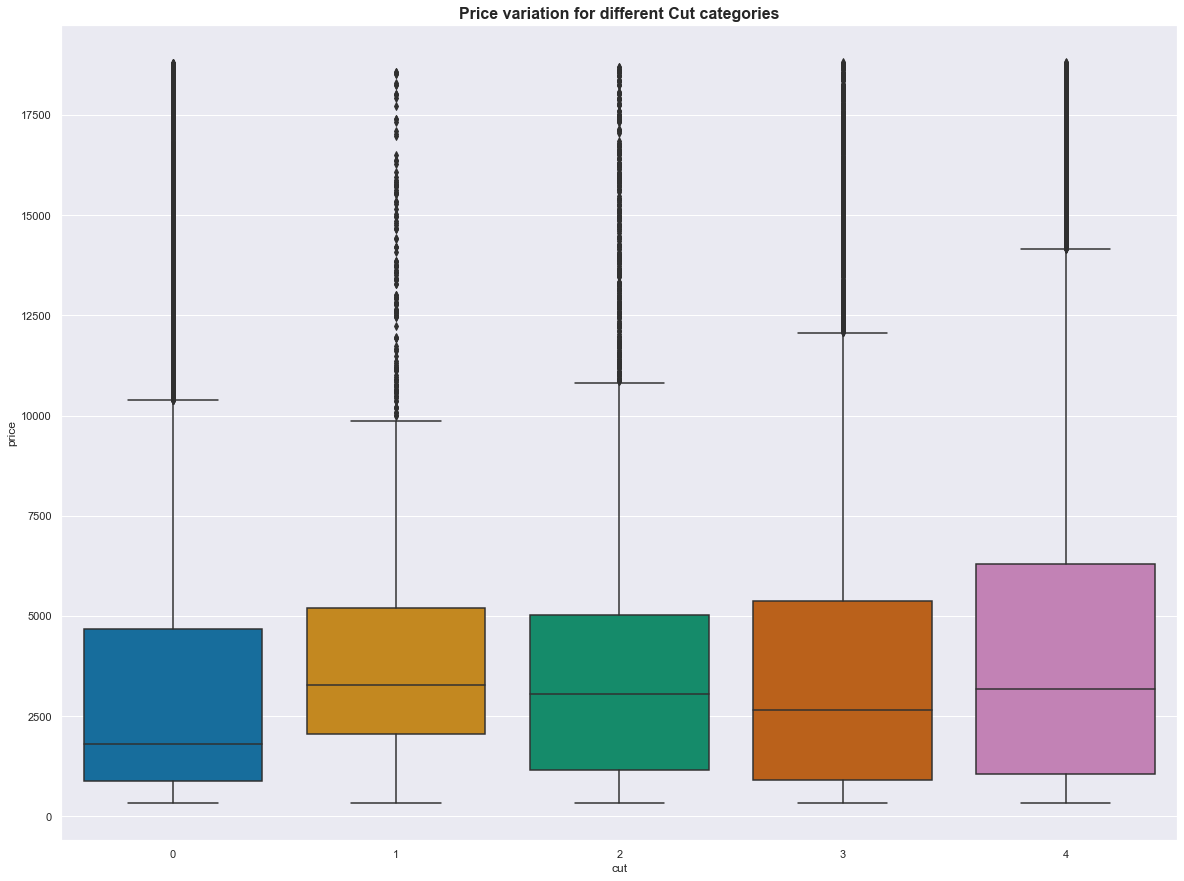

In [260]:
plt.figure(figsize=(20,15))
sns.boxplot(x=diamond_data['cut'],y=diamond_data['price'], palette='colorblind')
plt.title("Price variation for different Cut categories",fontsize = 16, fontweight = 'bold')
plt.show()

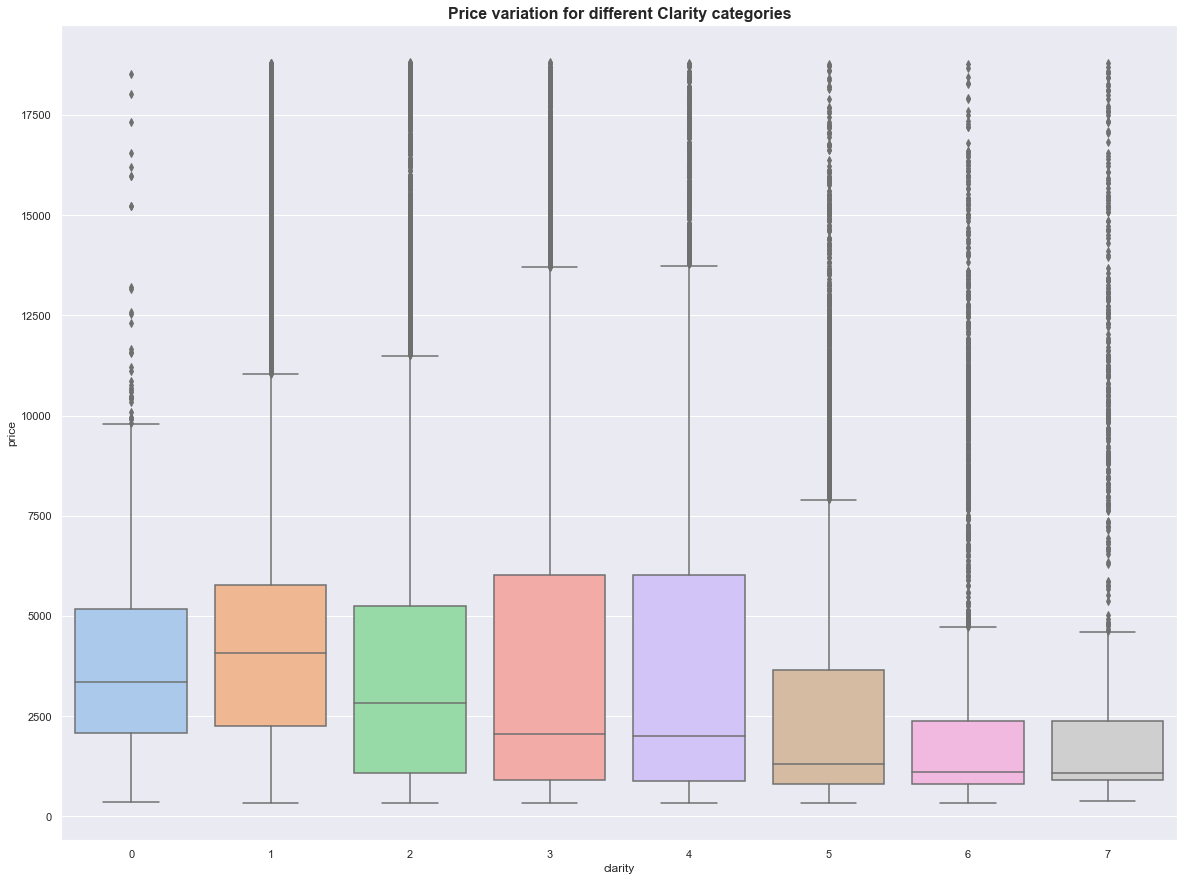

In [261]:
plt.figure(figsize=(20,15))
sns.boxplot(x=diamond_data['clarity'],y=diamond_data['price'], palette='pastel')
plt.title("Price variation for different Clarity categories",fontsize = 16, fontweight = 'bold')
plt.show()

### Normalization of necessary columns

In [35]:
normal_cols_data = diamond_data.iloc[:,[0,4,5,7]]
normal_cols_data

,carat,depth,table,volume
0,0.23,61.5,55.0,38.202030
1,0.21,59.8,61.0,34.505856
2,0.23,56.9,65.0,38.076885
3,0.29,62.4,58.0,46.724580
4,0.31,63.3,58.0,51.917250
...,...,...,...,...
53935,0.72,60.8,57.0,115.920000
53936,0.72,63.1,55.0,118.110175
53937,0.70,62.8,60.0,114.449728
53938,0.86,61.0,58.0,140.766120


In [36]:
df_normalized = (normal_cols_data - normal_cols_data.min()) / (normal_cols_data.max() - normal_cols_data.min())
df_normalized

,carat,depth,table,volume
0,0.006237,0.513889,0.230769,0.001705
1,0.002079,0.466667,0.346154,0.000735
2,0.006237,0.386111,0.423077,0.001672
3,0.018711,0.538889,0.288462,0.003943
4,0.022869,0.563889,0.288462,0.005306
...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.022109
53936,0.108108,0.558333,0.230769,0.022684
53937,0.103950,0.550000,0.326923,0.021723
53938,0.137214,0.500000,0.288462,0.028633


In [37]:
final_data = pd.concat([diamond_data.iloc[:,[1,2,3,4,6]], df_normalized], axis=1)
final_data

,cut,color,clarity,depth,price,carat,depth,table,volume
0,0,5,1,61.5,326,0.006237,0.513889,0.230769,0.001705
1,4,5,2,59.8,326,0.002079,0.466667,0.346154,0.000735
2,2,5,4,56.9,327,0.006237,0.386111,0.423077,0.001672
3,4,1,3,62.4,334,0.018711,0.538889,0.288462,0.003943
4,2,0,1,63.3,335,0.022869,0.563889,0.288462,0.005306
...,...,...,...,...,...,...,...,...,...
53935,0,6,2,60.8,2757,0.108108,0.494444,0.269231,0.022109
53936,2,6,2,63.1,2757,0.108108,0.558333,0.230769,0.022684
53937,3,6,2,62.8,2757,0.103950,0.550000,0.326923,0.021723
53938,4,2,1,61.0,2757,0.137214,0.500000,0.288462,0.028633


In [38]:
final_data.describe()

,cut,color,clarity,depth,price,carat,depth,table,volume
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,1.906083,3.405972,3.051502,61.749514,3930.993231,0.124262,0.520820,0.278016,0.025779
std,1.692897,1.701272,1.647005,1.432331,3987.280446,0.098502,0.039787,0.042963,0.020536
min,0.000000,0.000000,0.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,61.000000,949.000000,0.041580,0.500000,0.250000,0.008790
50%,2.000000,3.000000,3.000000,61.800000,2401.000000,0.103950,0.522222,0.269231,0.021826
75%,4.000000,5.000000,4.000000,62.500000,5323.250000,0.174636,0.541667,0.307692,0.036530
max,4.000000,6.000000,7.000000,79.000000,18823.000000,1.000000,1.000000,1.000000,1.000000


### Creating Data Matrix for X (input) and Y (price)

In [90]:
# creating data matrix

data_mat=np.array(final_data)
data_mat

array([[0.00000000e+00, 5.00000000e+00, 1.00000000e+00, ...,
        5.13888889e-01, 2.30769231e-01, 1.70497071e-03],
       [4.00000000e+00, 5.00000000e+00, 2.00000000e+00, ...,
        4.66666667e-01, 3.46153846e-01, 7.34563598e-04],
       [2.00000000e+00, 5.00000000e+00, 4.00000000e+00, ...,
        3.86111111e-01, 4.23076923e-01, 1.67211468e-03],
       ...,
       [3.00000000e+00, 6.00000000e+00, 2.00000000e+00, ...,
        5.50000000e-01, 3.26923077e-01, 2.17233216e-02],
       [4.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        5.00000000e-01, 2.88461538e-01, 2.86325239e-02],
       [0.00000000e+00, 6.00000000e+00, 1.00000000e+00, ...,
        5.33333333e-01, 2.30769231e-01, 2.43799265e-02]])

In [91]:
np.random.seed(263503)
sampled_row_indices = np.random.choice(data_mat.shape[0], size=data_mat.shape[0], replace=True)
sampled_row_indices

array([46784, 23104, 36691, ..., 52379, 40317, 46560])

In [95]:
X = data_mat[:,[0,1,2,3,5,6,7,8]]
X

array([[0.00000000e+00, 5.00000000e+00, 1.00000000e+00, ...,
        5.13888889e-01, 2.30769231e-01, 1.70497071e-03],
       [4.00000000e+00, 5.00000000e+00, 2.00000000e+00, ...,
        4.66666667e-01, 3.46153846e-01, 7.34563598e-04],
       [2.00000000e+00, 5.00000000e+00, 4.00000000e+00, ...,
        3.86111111e-01, 4.23076923e-01, 1.67211468e-03],
       ...,
       [3.00000000e+00, 6.00000000e+00, 2.00000000e+00, ...,
        5.50000000e-01, 3.26923077e-01, 2.17233216e-02],
       [4.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        5.00000000e-01, 2.88461538e-01, 2.86325239e-02],
       [0.00000000e+00, 6.00000000e+00, 1.00000000e+00, ...,
        5.33333333e-01, 2.30769231e-01, 2.43799265e-02]])

In [96]:
y = data_mat[:,4]
y

array([ 326.,  326.,  327., ..., 2757., 2757., 2757.])

### Dividing the dataset into training and test

In [97]:
split_point = int(0.8*len(sampled_row_indices))
split_point

43136

In [98]:
X_train = X[sampled_row_indices[:split_point]]
y_train = y[sampled_row_indices[:split_point]]
X_test = X[sampled_row_indices[split_point:]]
y_test = y[sampled_row_indices[split_point:]]

###  Printing the shape of X_train, y_train, X_test, y_test.

In [99]:
X_train

array([[0.        , 4.        , 3.        , ..., 0.47222222, 0.36538462,
        0.01398092],
       [0.        , 4.        , 4.        , ..., 0.51944444, 0.25      ,
        0.04798728],
       [0.        , 0.        , 6.        , ..., 0.54166667, 0.25      ,
        0.01110629],
       ...,
       [4.        , 3.        , 2.        , ..., 0.54722222, 0.30769231,
        0.03442106],
       [2.        , 6.        , 3.        , ..., 0.48888889, 0.40384615,
        0.0107535 ],
       [0.        , 2.        , 3.        , ..., 0.53888889, 0.25      ,
        0.05556069]])

In [262]:
print(X_train.shape)

(43136, 8)


In [100]:
y_train

array([ 1806., 11136.,   953., ...,  4808.,  1238., 12219.])

In [263]:
print(y_train.shape)

(43136,)


In [101]:
X_test

array([[0.00000000e+00, 5.00000000e+00, 3.00000000e+00, ...,
        5.19444444e-01, 2.50000000e-01, 5.56323747e-03],
       [0.00000000e+00, 6.00000000e+00, 3.00000000e+00, ...,
        5.11111111e-01, 2.30769231e-01, 7.94582763e-03],
       [0.00000000e+00, 5.00000000e+00, 7.00000000e+00, ...,
        5.22222222e-01, 2.50000000e-01, 4.37081031e-02],
       ...,
       [4.00000000e+00, 5.00000000e+00, 2.00000000e+00, ...,
        5.22222222e-01, 3.07692308e-01, 2.27376097e-02],
       [3.00000000e+00, 6.00000000e+00, 5.00000000e+00, ...,
        5.27777778e-01, 3.46153846e-01, 8.68213452e-03],
       [3.00000000e+00, 5.00000000e+00, 2.00000000e+00, ...,
        4.30555556e-01, 3.07692308e-01, 1.63370522e-02]])

In [264]:
print(X_test.shape)

(10784, 8)


In [102]:
y_test

array([  639.,  1003., 17353., ...,  2510.,  1128.,  1785.])

In [265]:
print(y_test.shape)

(10784,)


### Building Linear Regression Model

In [226]:
# Linear Regression Class
class LinearRegressor():
    def __init__(self):
        self.weights = None
        
    def cost(self,x):
        val = self.y-(np.dot(x,self.weights))
        jW = 0.5*np.dot(val.T,val)
        
        return jW
    
    def fit(self, X, y):
        n_rows, n_features = X.shape
        
        self.X = np.c_[np.ones((n_rows,1)),X]
        self.y = y
        self.loss = 0
        
        XTranspose_X_Matrix=np.dot(self.X.T,self.X)
        XTranspose_X_Matrix_Inv=np.linalg.pinv(XTranspose_X_Matrix)
        XTranspose_Y=np.dot(self.X.T,self.y)

        self.weights = np.dot(XTranspose_X_Matrix_Inv,XTranspose_Y)
        
        jWeights = self.cost(self.X)

        self.loss = jWeights
        
        
    def predict(self,X):
        X_test = np.c_[np.ones((X.shape[0],1)),X]
        y_hat = np.dot(X_test,self.weights)  
        
        return y_hat
        

In [126]:
def MeanSquareError(y_true,y_hat):
    
    Numerator = np.sum((y_hat - y_true)**2)
    Denominator = y_true.shape[0]

    Value_of_MSE = Numerator/Denominator

    return Value_of_MSE

In [129]:
def RSquared(y_true,y_hat):
    
    Sum_of_Square_Error = np.sum((y_hat - y_true)**2)
    Sum_of_Square_Total = np.sum((y_true - y_true.mean())**2)
    Division_Value = Sum_of_Square_Error/Sum_of_Square_Total

    Value_of_R_Square = 1-Division_Value
    
    return Value_of_R_Square

In [227]:
lm1 = LinearRegressor()
lm1.fit(X_train,y_train)

In [266]:
lm1.loss

32598096141.657288

In [387]:
lm1.weights

array([ 1.12034910e+02,  1.53327585e+01,  3.17006592e+02,  5.27474643e+02,
       -5.38807686e+01,  2.96382374e+04, -1.35316153e+02, -2.80492955e+03,
        6.18490233e+04])

In [232]:
pred_lm = lm1.predict(X_test)
pred_lm

array([  267.02305454,  1110.71312464, 10214.37853925, ...,
        3221.84702407,  2083.8249725 ,  1953.3512803 ])

In [106]:
y_test

array([  639.,  1003., 17353., ...,  2510.,  1128.,  1785.])

In [233]:
print('Mean Square Error:',MeanSquareError(y_test,pred_lm))

Mean Square Error: 1789295.7818755812


In [234]:
print('R Square:',RSquared(y_test,pred_lm))

R Square: 0.8869530633630873


### Plot for Prediction vs Actual targets

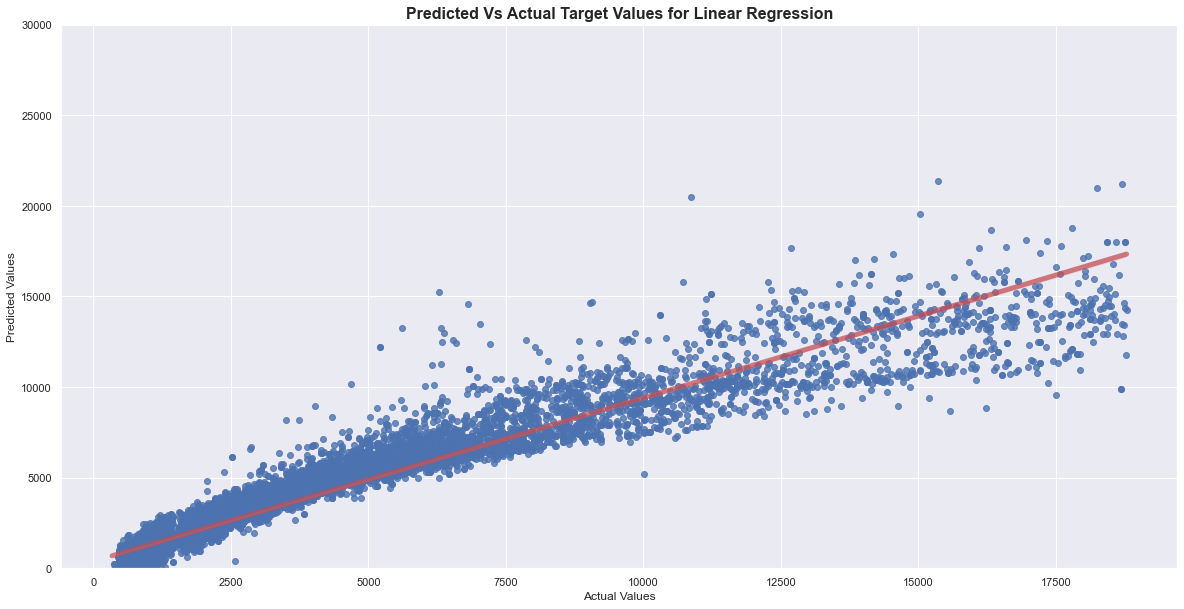

In [384]:
plt.figure(figsize=(20,10))
sns.regplot(x=y_test, y=pred_lm, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Predicted Vs Actual Target Values for Linear Regression",fontsize = 16, fontweight = 'bold')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.ylim(0,30000)
plt.show()

In [388]:
import pickle
pickle.dump(lm1.weights,open("/Users/rohituddagiri/Documents/CSE 574/linear_regression_model_weights.p","wb"))

## Part - 3 Ridge Regression

In [239]:
class RidgeRegressor():
    def __init__(self):  
        self.weights = None
        
        
    def cost(self,x):
        val = self.y-(np.dot(x,self.weights))
        jW = (0.5*np.dot(val.T,val)) + (0.5*self.lambd*(np.dot(self.weights.T,self.weights)))  
        
        return jW     

        
    def fit(self,X,y,lambd):     
        n_rows, n_features = X.shape
        self.lambd = lambd
        self.X = np.c_[np.ones((n_rows,1)),X]
        self.y = y
        self.loss = 0
        
        a = np.dot(self.X.T,self.X)+(self.lambd*(np.identity(1+n_features)))
        b = np.dot(self.X.T,y)
        self.weights = np.dot(np.linalg.pinv(a),b)     
        jWeights = self.cost(self.X)
        
        self.loss = jWeights

    
    def predict(self,X):
        X_test = np.c_[np.ones((X.shape[0],1)),X]
        y_hat = np.dot(X_test,self.weights)        
        
        return y_hat

In [208]:
model1 = RidgeRegressor()
model1.fit(X_train,y_train,lambd=0.5)

In [209]:
model1.loss

33117030916.51486

In [282]:
model1.weights

array([ 5.36758065e+02,  1.60083446e+01,  3.16104657e+02,  5.26970235e+02,
       -5.44863532e+01,  3.92336995e+04, -6.42641199e+02, -3.14856379e+03,
        1.46091467e+04])

In [235]:
pred_rg = model1.predict(X_test)

In [236]:
pred_rg

array([  275.50418379,  1116.50171764, 10192.87322635, ...,
        3218.83324677,  2067.22654498,  1961.39393197])

In [212]:
y_test

array([  639.,  1003., 17353., ...,  2510.,  1128.,  1785.])

In [237]:
print('Mean Square Error:',MeanSquareError(y_test,pred_rg))

Mean Square Error: 1503292.2573240497


In [238]:
print('R Square:',RSquared(y_test,pred_rg))

R Square: 0.9050226428286019


### Plot for Prediction vs Actual targets

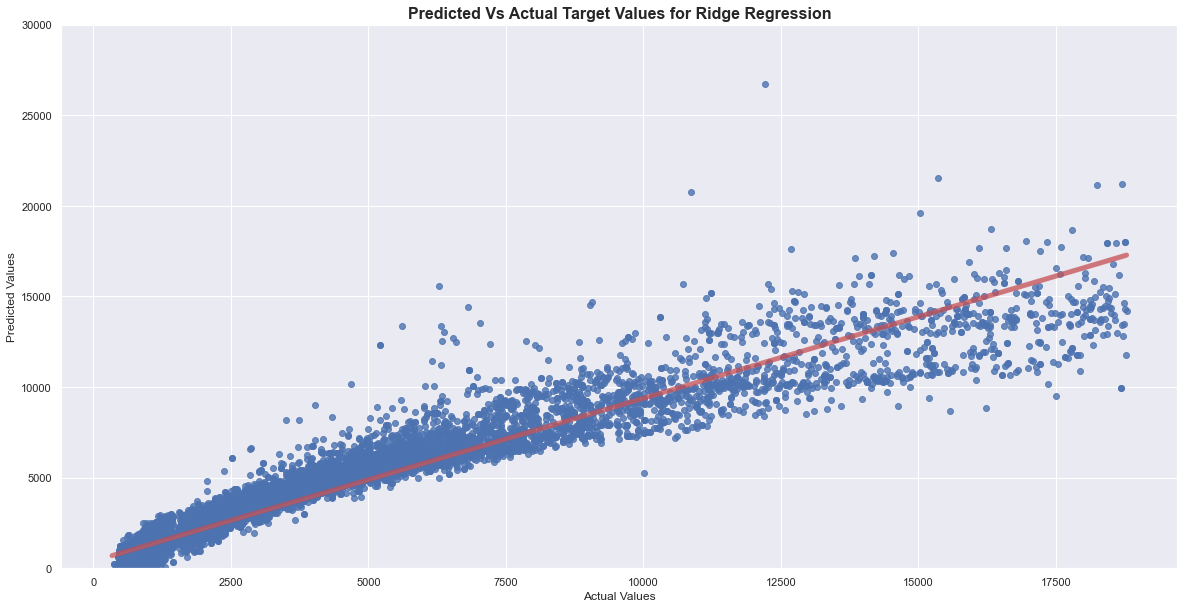

In [386]:
plt.figure(figsize=(20,10))
sns.regplot(x=y_test, y=pred_rg, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Predicted Vs Actual Target Values for Ridge Regression",fontsize = 16, fontweight = 'bold')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.ylim(0,30000)
plt.show()

In [389]:
import pickle
pickle.dump(model1.weights,open("/Users/rohituddagiri/Documents/CSE 574/ridge_regression_model_weights.p","wb"))

## Gradient Descent

In [377]:
class RidgeRegressorGradient():
    def __init__(self,learning_rate = 1e-3,num_iterations = 100000):  
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
        
    def cost(self,x):
        val = self.y-(np.dot(x,self.weights))
        jW = (0.5*np.dot(val.T,val)) + (0.5*self.lambd*(np.dot(self.weights.T,self.weights)))  
        
        return jW     
    
    
    def gradient_descent(self,y):
        
        dW = ( - ( 2 * ( self.X.T ).dot( self.y - y ) ) +               
               ( 2 * self.lambd * self.weights ) ) / self.n_rows     
        db = - 2 * np.sum( self.y - y ) / self.n_rows
                

        return dW, db
        
    def fit(self,X,y,lambd):     
        self.n_rows, self.n_features = X.shape
        self.lambd = lambd
#         self.X = np.c_[np.ones((self.n_rows,1)),X]
        self.X = X
        self.y = y
        self.loss = []
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        
#         a = np.dot(self.X.T,self.X)+(self.lambd*(np.identity(1+self.n_features)))
#         b = np.dot(self.X.T,y)
#         self.weights = np.dot(np.linalg.pinv(a),b)     
#         print(self.weights)
        
        for i in range(self.num_iterations):
            y_pred = np.dot(self.X,self.weights) + self.bias
#             dWeights = self.gradient_descent(y_pred)
            print('Weights:',self.weights)
            print('Bias:',self.bias)
            dWeights, dBias = self.gradient_descent(y_pred)
            self.weights = self.weights - self.learning_rate * dWeights
            self.bias = self.bias - self.learning_rate * dBias
            
#             dWeights = self.gradient_descent(self.X)
#             self.weights = self.weights - self.learning_rate*dWeights
            
#             print(self.weights)
#         for i in range(self.num_iterations):
#             jWeights = self.cost(self.X)
#             self.loss.append(jWeights)
                
# #             dWeights = self.gradient_descent(self.X)
# #             print(dWeights)
#             self.weights = self.weights - self.learning_rate*dWeights

    
    def predict(self,X):
#         X_test = np.c_[np.ones((X.shape[0],1)),X]
        y_hat = np.dot(X_test,self.weights)
        
        return y_hat

In [378]:
rgm1 = RidgeRegressorGradient(learning_rate=0.01,num_iterations=10)
rgm1.fit(X_train,y_train,lambd=1)

Weights: [0. 0. 0. 0. 0. 0. 0. 0.]
Bias: 0
Weights: [1.65124528e+02 2.43513171e+02 2.19736296e+02 4.85123583e+03
 1.70084012e+01 4.08894064e+01 2.23450426e+01 3.50302930e+00]
Bias: 78.5864465875371
Weights: [-1.12840416e+04 -1.99748541e+04 -1.78975300e+04 -3.62824961e+05
 -7.16751130e+02 -3.06408920e+03 -1.63343436e+03 -1.48515429e+02]
Bias: -5872.505770186457
Weights: [8.57757936e+05 1.51128280e+06 1.35434294e+06 2.75136691e+07
 5.54669855e+04 2.32343212e+05 1.23941194e+05 1.14899419e+04]
Bias: 445332.86870045494
Weights: [-6.50300970e+07 -1.14586726e+08 -1.02687077e+08 -2.08601823e+09
 -4.20370742e+06 -1.76157052e+07 -9.39680378e+06 -8.70799264e+05]
Bias: -33764019.36674435
Weights: [4.93043721e+09 8.68769728e+09 7.78549422e+09 1.58157136e+11
 3.18717698e+08 1.33558250e+09 7.12444338e+08 6.60224615e+07]
Bias: 2559910825.9245453
Weights: [-3.73814467e+11 -6.58681343e+11 -5.90278370e+11 -1.19911123e+13
 -2.41644441e+10 -1.01260810e+11 -5.40158999e+10 -5.00567145e+09]
Bias: -19408658332

In [379]:
y_test

array([  639.,  1003., 17353., ...,  2510.,  1128.,  1785.])

In [380]:
pred_rgm1 = rgm1.predict(X_test)
pred_rgm1

array([-2.46166440e+22, -2.45194878e+22, -2.47344487e+22, ...,
       -2.46863531e+22, -2.48335554e+22, -2.33661216e+22])

## Elastic Net

In [ ]:
class ElasticNetRegressor():
    def __init__(self):  
        self.weights = None
        
        
    def cost(self,x):
        val = self.y-(np.dot(x,self.weights))
        jW = (0.5*np.dot(val.T,val)) + (0.5*self.lambd*(np.dot(self.weights.T,self.weights)))  
        
        return jW     

        
    def fit(self,X,y,lambd1,lambd2):     
        n_rows, n_features = X.shape
        self.lambd1 = lambd1
        self.lambd2 = lambd2
        self.X = np.c_[np.ones((n_rows,1)),X]
        self.y = y
        self.loss = 0
        
        a = np.dot(self.X.T,self.X)+(self.lambd*(np.identity(1+n_features)))
        b = np.dot(self.X.T,y)
        
        l1 = self.lambd1 * (np.sign(self.weights))
        l2 = self.lambd2 * ()
        self.weights = np.dot(np.linalg.pinv(a),b) 
        
        
        jWeights = self.cost(self.X)
        
        self.loss = jWeights

    
    def predict(self,X):
        X_test = np.c_[np.ones((X.shape[0],1)),X]
        y_hat = np.dot(X_test,self.weights)        
        
        return y_hat
        

        

## References

- https://www.data-to-viz.com
- https://ggplot2.tidyverse.org/reference/diamonds.html
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://towardsdatascience.com/from-linear-regression-to-ridge-regression-the-lasso-and-the-elastic-net-4eaecaf5f7e6